In [1]:
import numpy as np
import json
import matplotlib.pyplot as plt

In [2]:
with open("ckpts/sft_bios_new_llama7B/checkpoint_20000/hf_model/factscores_test_medium.json", "r") as f:
    factscores = json.load(f)

num_true_all = []
num_total_all = []
skipped_idxs = []
for i in range(len(factscores["decisions"])):
    decison = factscores["decisions"][i]
    if decison == None:
        skipped_idxs.append(i)
    else:
        num_total = len(decison)
        num_total_all.append(min(num_total, 6))
        num_true = np.sum([fact["is_supported"] for fact in decison])
        num_true_all.append(min(num_true, 6))

num_true_all = np.array(num_true_all)
num_total_all = np.array(num_total_all)

In [11]:
generated_responses = np.load("ckpts/sft_bios_new_llama7B/checkpoint_20000/hf_model/output_strings_test_medium.npy")
generated_responses

array(['<unk><unk><unk><unk><unk><unk><unk><unk> Write a one sentence biography for Dead Child: Dead Child was an American rock band from New York City, formed in 1999.',
       '<unk> Write a one sentence biography for Velusami Radhakrishnan: Velusami Radhakrishnan was an Indian politician and former Member of the Legislative Assembly of Tamil Nadu.',
       '<unk><unk><unk><unk><unk> Write a one sentence biography for Gentian Stojku: Gentian Stojku is a retired Albanian football player.',
       ...,
       '<unk> Write a one sentence biography for Apirak Kosayodhin: Apirak Kosayodhin is a Thai politician and former Deputy Prime Minister of Thailand.',
       '<unk> Write a one sentence biography for Ian Walsh (footballer): Ian Walsh is an English former professional footballer who played as a midfielder.',
       '<unk> Write a one sentence biography for Ineabelle Díaz: Ineabelle Díaz is a Venezuelan beauty pageant titleholder who was crowned Miss Venezuela 2012.'],
      dtype='<U2

In [10]:
factscores["decisions"]

[[{'atom': 'Dead Child was an American rock band.', 'is_supported': False},
  {'atom': 'Dead Child was from New York City.', 'is_supported': False},
  {'atom': 'Dead Child was formed in 1999.', 'is_supported': False}],
 [{'atom': 'Velusami Radhakrishnan was an Indian politician.',
   'is_supported': False},
  {'atom': 'Velusami Radhakrishnan was a former Member of the Legislative Assembly of Tamil Nadu.',
   'is_supported': False}],
 [{'atom': 'Gentian Stojku is retired.', 'is_supported': True},
  {'atom': 'Gentian Stojku is Albanian.', 'is_supported': True},
  {'atom': 'Gentian Stojku is a football player.', 'is_supported': False}],
 [{'atom': 'Diego Herner is German.', 'is_supported': False},
  {'atom': 'Diego Herner is former professional.', 'is_supported': True},
  {'atom': 'Diego Herner was a footballer.', 'is_supported': True},
  {'atom': 'Diego Herner played as a midfielder.', 'is_supported': False}],
 [{'atom': 'Mbali Ntuli is an actress.', 'is_supported': False},
  {'atom': 'M

In [3]:
model_path = "ckpts/rm2_bios_llama7B_5/checkpoint_05000/hf_model"
# model_path = "ckpts/rm2_bios_llama7B_3/checkpoint_05000/hf_model"


pred_num_correct_zero_to_six_probs = np.load(model_path+"/test_medium_num_correct_zero_to_six_probs.npy")
pred_num_correct_zero_to_six_probs2 = np.load(model_path+"/true_bios_num_correct_zero_to_six_probs.npy")
pred_num_correct_zero_to_six_probs3 = np.load(model_path+"/false_bios_num_correct_zero_to_six_probs.npy")





pred_num_total_zero_to_six_probs = np.load(model_path+"/test_medium_num_total_zero_to_six_probs.npy")
pred_num_total_zero_to_six_probs2 = np.load(model_path+"/true_bios_num_total_zero_to_six_probs.npy")
pred_num_total_zero_to_six_probs3 = np.load(model_path+"/false_bios_num_total_zero_to_six_probs.npy")


In [3]:
model_path = "ckpts/rm3_bios_llama7B/checkpoint_30000/hf_model"

pred_num_correct = np.load(model_path+"/test_medium_num_correct_preds.npy")
pred_num_total = np.load(model_path+"/test_medium_num_total_preds.npy")

In [7]:
(abs(pred_num_correct-num_true_all)).sum()/pred_num_total.sum()

0.2538981462892324

In [8]:
num_true_all.sum()/pred_num_total.sum()

0.4812286689419795

Text(0, 0.5, 'Density')

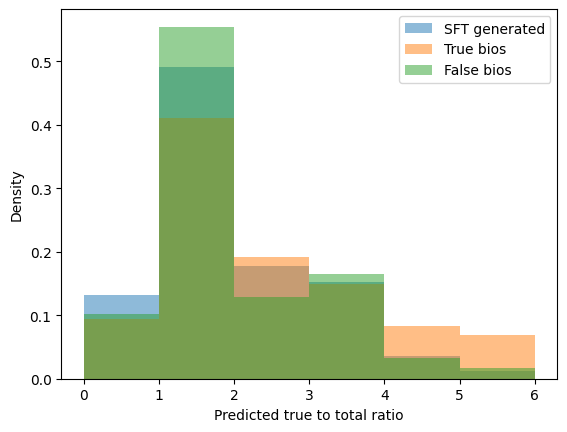

In [280]:

def  get_pred_ratio(pred_num_correct_zero_to_six_probs, pred_num_total_zero_to_six_probs):
    num_correct = np.tile([0, 1, 2, 3, 4, 5, 6], (6, 1))
    num_total = np.tile([1, 2, 3, 4, 5, 6], (7, 1)).transpose()

    ratios = num_correct/num_total

    pred_ratio = []
    for i in range(len(pred_num_correct_zero_to_six_probs)):
        num_correct_probs = np.tile(pred_num_correct_zero_to_six_probs[i], (6, 1))
        num_total_probs = np.tile(pred_num_total_zero_to_six_probs[i, 1:], (7, 1)).transpose()

        ratios_probs = num_correct_probs*num_total_probs

        pred_ratio.append(np.sum(ratios_probs*ratios))
    return pred_ratio



# pred_ratio = pred_num_correct_zero_to_six_probs.argmax(axis=1)/pred_num_total_zero_to_six_probs.argmax(axis=1)
# pred_ratio = get_pred_ratio(pred_num_correct_zero_to_six_probs, pred_num_total_zero_to_six_probs)
pred_correct = pred_num_correct_zero_to_six_probs.argmax(axis=1)
# plt.hist(pred_ratio, alpha=0.5, bins = np.arange(0, 1, 0.1), density=True, label = "SFT generated")
plt.hist(pred_correct, alpha=0.5, bins = np.arange(0, 7, 1), density=True, label = "SFT generated")


# pred_ratio2 = pred_num_correct_zero_to_six_probs2.argmax(axis=1)/pred_num_total_zero_to_six_probs2.argmax(axis=1)
# pred_ratio2 = get_pred_ratio(pred_num_correct_zero_to_six_probs2, pred_num_total_zero_to_six_probs2)
# plt.hist(pred_ratio2, alpha=0.5, bins = np.arange(0, 1, 0.1), density=True, label = "True bios")
pred_correct2 = pred_num_correct_zero_to_six_probs2.argmax(axis=1)
plt.hist(pred_correct2, alpha=0.5, bins = np.arange(0, 7, 1), density=True, label = "True bios")

# pred_ratio3 = pred_num_correct_zero_to_six_probs3.argmax(axis=1)/pred_num_total_zero_to_six_probs3.argmax(axis=1)
# pred_ratio3 = get_pred_ratio(pred_num_correct_zero_to_six_probs3, pred_num_total_zero_to_six_probs3)
# plt.hist(pred_ratio3, alpha=0.5, bins = np.arange(0, 1, 0.1), density=True, label = "False bios")
pred_correct3 = pred_num_correct_zero_to_six_probs3.argmax(axis=1)
plt.hist(pred_correct3, alpha=0.5, bins = np.arange(0, 7, 1), density=True, label = "False bios")

plt.legend()
plt.xlabel("Predicted true to total ratio")
plt.ylabel("Density")

(array([1.99898785, 0.55836707, 1.46592443, 1.29217274, 0.96659919,
        0.38461538]),
 array([0.  , 0.15, 0.3 , 0.45, 0.6 , 0.75, 0.9 ]),
 <BarContainer object of 6 artists>)

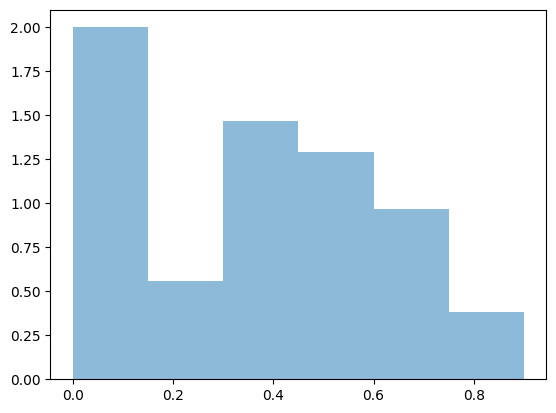

In [275]:
plt.hist(np.array(num_true_all)/np.array(num_total_all), alpha=0.5, bins = np.arange(0, 1, 0.15), density=True, label = "True ratio")

0.30097882666666664
0.2876144736320475


(0.0, 1.0)

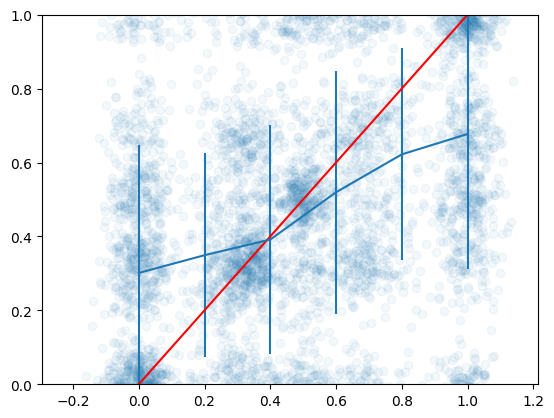

In [4]:
# num_correct = np.tile([0, 1, 2, 3, 4, 5, 6], (6, 1))
# num_total = np.tile([1, 2, 3, 4, 5, 6], (7, 1)).transpose()

# ratios = num_correct/num_total

# pred_ratio = []
# for i in range(len(pred_num_correct_zero_to_six_probs)):
#     num_correct_probs = np.tile(pred_num_correct_zero_to_six_probs[i], (6, 1))
#     num_total_probs = np.tile(pred_num_total_zero_to_six_probs[i, 1:], (7, 1)).transpose()

#     ratios_probs = num_correct_probs*num_total_probs

#     pred_ratio.append(np.sum(ratios_probs*ratios))

# pred_ratio = pred_num_correct_zero_to_six_probs.argmax(axis=1)/pred_num_total_zero_to_six_probs.argmax(axis=1)+np.random.normal(0, 0.05, len(num_true_all))
# pred_ratio = (pred_num_correct_zero_to_six_probs*[[0, 1, 2, 3, 4, 5, 6]]).sum(axis=1)/(pred_num_total_zero_to_six_probs*[[0, 1, 2, 3, 4, 5, 6]]).sum(axis=1)+np.random.normal(0, 0.05, len(num_true_all))


pred_ratio = pred_num_correct/pred_num_total+np.random.normal(0, 0.05, len(num_true_all))

ratio = np.array(num_true_all)/np.array(num_total_all)
# print(np.std(ratio))

print(np.mean(abs(ratio-np.mean(ratio))))


ratio_error = abs(ratio-pred_ratio)
print(np.mean(ratio_error))


plt.scatter(np.array(num_true_all)/np.array(num_total_all)+np.random.normal(0, 0.05, len(num_true_all)), pred_ratio, alpha=0.05)

x_ranges = np.arange(0, 1.2, 0.2)
y_means = []
y_stds = []

for x in x_ranges:
    idxs = np.where((x <= ratio) & (ratio < x+0.1))[0]
    y_means.append(np.mean(pred_ratio[idxs]))
    y_stds.append(np.std(pred_ratio[idxs]))

plt.errorbar(x_ranges, y_means, yerr=y_stds)#, fmt='o', color="red")
plt.plot([0, 1], [0, 1], color="red")
plt.ylim(0, 1)

-3 -2.4864864864864864
-2 -1.55
1 -1.5027522935779816
0 -0.7561683599419449
0 -0.6245954692556634
-2 -0.08093994778067885
0 0.1273344651952462
-1 0.7335701598579041
-2 1.1775510204081632


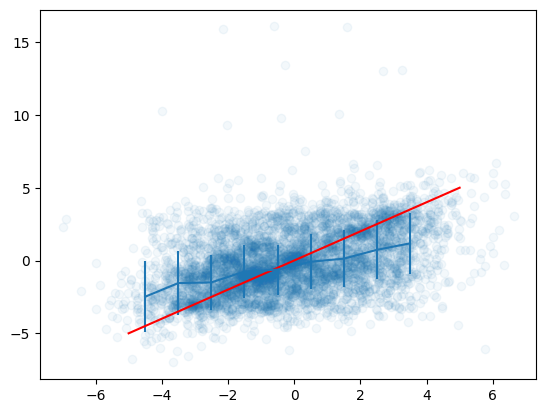

In [5]:
num_fake_all = num_total_all - num_true_all
# pred_num_incorrect = pred_num_total_zero_to_six_probs.argmax(-1) - pred_num_correct_zero_to_six_probs.argmax(-1)
# pred_num_correct = pred_num_correct_zero_to_six_probs.argmax(-1)


pred_num_incorrect = pred_num_total - pred_num_correct
plt.scatter(np.array(num_true_all)-num_fake_all+np.random.normal(0, 0.4, len(num_true_all)), pred_num_correct-pred_num_incorrect+np.random.normal(0, 0.4, len(num_true_all)), alpha=0.05)


x_ranges = np.arange(-5, 5, 1)
reward_real = np.array(num_true_all)-num_fake_all
reward_predicted = pred_num_correct-pred_num_incorrect
reward_predicted_all = []
reward_predicted_all_std = []

for i in range(x_ranges.shape[0]-1):
    mask = (reward_real >= x_ranges[i]) & (reward_real < x_ranges[i+1])
    print(reward_real[i], np.mean(reward_predicted[mask]))
    reward_predicted_all.append(np.mean(reward_predicted[mask]))
    reward_predicted_all_std.append(np.std(reward_predicted[mask]))

plt.errorbar(x_ranges[:-1]+0.5, reward_predicted_all, yerr=reward_predicted_all_std,)

plt.plot([-5, 5], [-5, 5], color="red")



In [277]:
(np.array(num_true_all)/np.array(num_total_all)).mean()

0.47103999999999996

<ErrorbarContainer object of 3 artists>

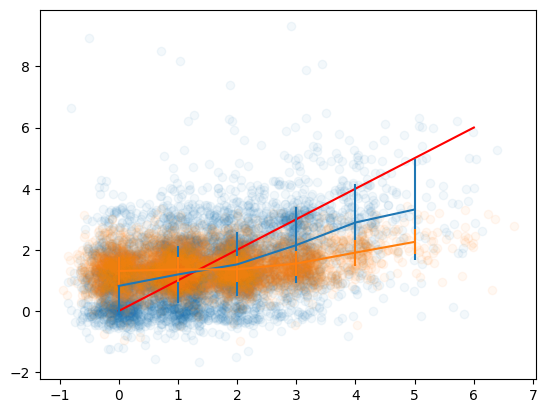

In [6]:
# pred_zero_to_six_probs.argmax(axis=1)
# pred_zero_to_six_probs*[[0, 1, 2, 3, 4, 5, 6]]

# plt.scatter(np.array(num_true_all)+np.random.normal(0, 0.1, len(num_true_all)), (pred_num_correct_zero_to_six_probs*[[0, 1, 2, 3, 4, 5, 6]]).sum(axis=1), alpha=0.05)
plt.scatter(np.array(num_true_all)+np.random.normal(0, 0.3, len(num_true_all)), pred_num_correct+np.random.normal(0, 0.3, len(num_true_all)), alpha=0.05)


plt.scatter(np.array(num_true_all)+np.random.normal(0, 0.3, len(num_true_all)), 0.47*pred_num_total+np.random.normal(0, 0.3, len(num_true_all)), alpha=0.05)

# plt.scatter(np.array(num_total_all)+np.random.normal(0, 0.2, len(num_total_all)), (pred_num_total_zero_to_six_probs*[[0, 1, 2, 3, 4, 5, 6]]).sum(axis=1), alpha=0.1)

plt.plot([0, 6], [0, 6], color="red")

x_ranges = np.arange(0, 6, 1)
y_means = []
y_stds = []

for x in x_ranges:
    idxs = np.where((x <= num_true_all) & (num_true_all < x+0.1))[0]
    y_means.append(np.mean(pred_num_correct[idxs]))
    y_stds.append(np.std(pred_num_correct[idxs]))

plt.errorbar(x_ranges, y_means, yerr=y_stds)#, fmt='o', color="red")


x_ranges = np.arange(0, 6, 1)
y_means = []
y_stds = []

for x in x_ranges:
    idxs = np.where((x <= num_true_all) & (num_true_all < x+0.1))[0]
    y_means.append(np.mean(0.47*pred_num_total[idxs]))
    y_stds.append(np.std(0.47*pred_num_total[idxs]))

plt.errorbar(x_ranges, y_means, yerr=y_stds)#, fmt='o', color="red")


NameError: name 'pred_num_correct_zero_to_six_probs' is not defined

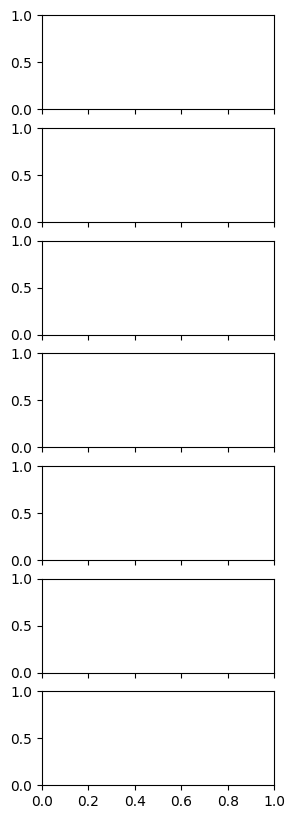

In [7]:
#make 7 subplots vertically
fig, axs = plt.subplots(7, 1, sharex=True, figsize=(3, 10))

for i in range(7):
    idxs = np.where(np.array(num_true_all) == i)[0]
    # axs[i].hist((pred_num_correct_zero_to_six_probs[idxs]*[[0, 1, 2, 3, 4, 5, 6]]).sum(axis=1), bins=[0, 1, 2, 3, 4, 5, 6])

    axs[i].hist(pred_num_correct_zero_to_six_probs[idxs].argmax(-1), bins=np.array([0, 1, 2, 3, 4, 5, 6])-0.5)

    # axs[i].bar([0, 1, 2, 3, 4, 5, 6], (pred_num_correct_zero_to_six_probs[idxs]).mean(axis=0))

    axs[i].set_xticks(np.arange(0, 7, 1), [0, 1, 2, 3, 4, 5, 6])

    # axs[i].hist((pred_num_correct_zero_to_six_probs[idxs].argmax(-1)), bins=np.array([0, 1, 2, 3, 4, 5, 6, 7])-0.5)



    # axs[i].scatter(num_true_all, pred_num_correct_zero_to_six_probs[:, i], alpha=0.05)
    # axs[i].plot([0, 6], [0, 1], color="red")
    # axs[i].set_title(f"num_true={i}")

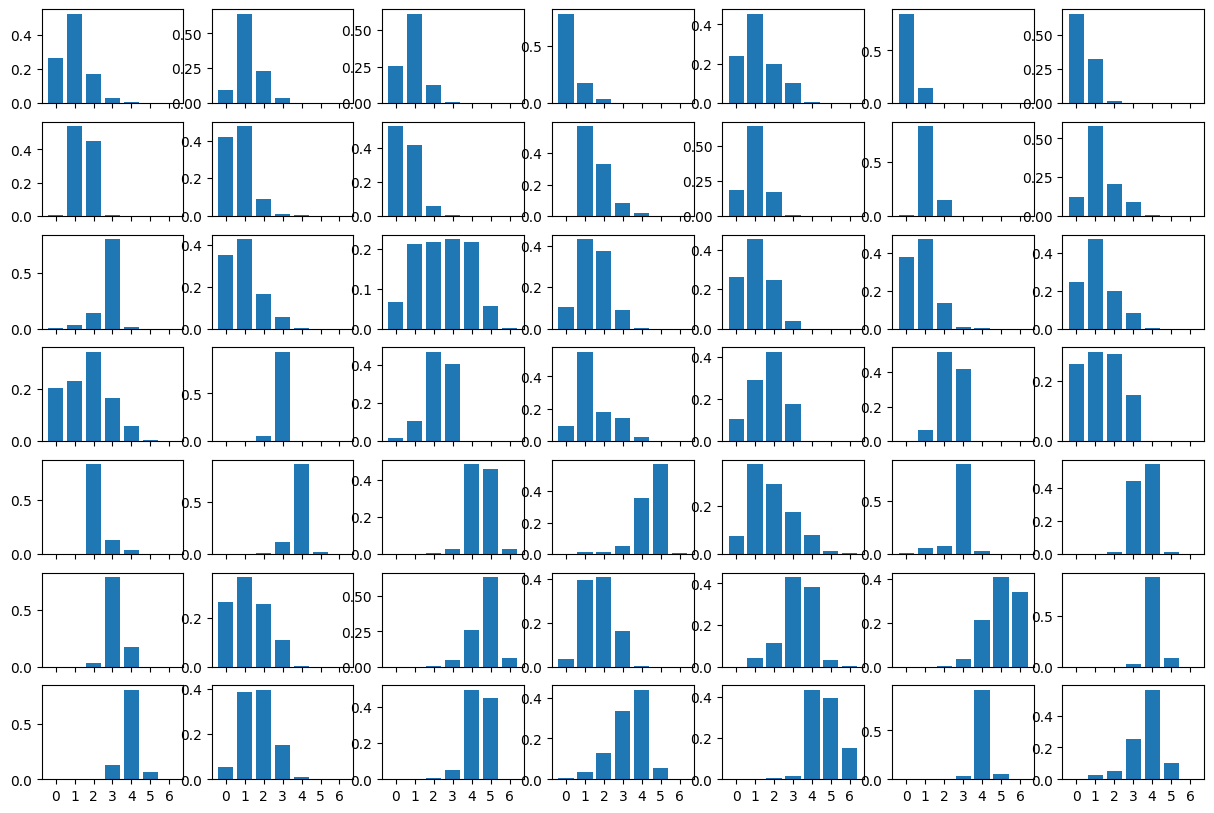

In [141]:
#make 7 subplots vertically
fig, axs = plt.subplots(7, 7, sharex=True, figsize=(15, 10))

for i in range(7):
    for j in range(7):
        idxs = np.where(np.array(num_true_all) == i)[0]
        # axs[i].hist((pred_num_correct_zero_to_six_probs[idxs]*[[0, 1, 2, 3, 4, 5, 6]]).sum(axis=1), bins=[0, 1, 2, 3, 4, 5, 6])

        # axs[i][j].hist(pred_num_correct_zero_to_six_probs[idxs].argmax(-1), bins=np.array([0, 1, 2, 3, 4, 5, 6])-0.5)

        axs[i][j].bar([0, 1, 2, 3, 4, 5, 6], (pred_num_correct_zero_to_six_probs[idxs[j]]))

        axs[i][j].set_xticks(np.arange(0, 7, 1), [0, 1, 2, 3, 4, 5, 6])

        # axs[i].hist((pred_num_correct_zero_to_six_probs[idxs].argmax(-1)), bins=np.array([0, 1, 2, 3, 4, 5, 6, 7])-0.5)



        # axs[i].scatter(num_true_all, pred_num_correct_zero_to_six_probs[:, i], alpha=0.05)
        # axs[i].plot([0, 6], [0, 1], color="red")
        # axs[i].set_title(f"num_true={i}")

(0.0, 1.0)

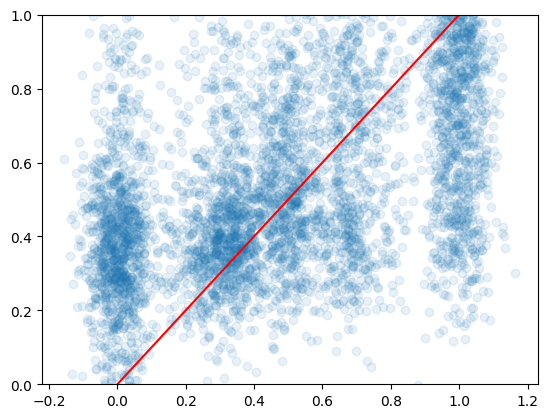